In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import csv
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
from sklearn import preprocessing
import graphviz

plt.ioff()
pd.set_option('display.max_columns', None)

In [2]:
from sklearn.datasets import load_wine
data = load_wine()

In [3]:
print(data.keys())

['target_names', 'data', 'target', 'DESCR', 'feature_names']


In [4]:
print(data.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [5]:
data_frame = pd.DataFrame(data.data, columns=data.feature_names)

In [6]:
data_frame['Y'] = data.target

In [7]:
data_frame.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [8]:
X = data_frame.drop('Y', axis=1)
Y = data_frame['Y']

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/4., random_state=0)

In [10]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

train_mse = sklearn.metrics.mean_squared_error(Y_train, Y_train_pred)
test_mse = sklearn.metrics.mean_squared_error(Y_test, Y_test_pred)
print("Train MSE {}".format(train_mse))
print("Test MSE {}".format(test_mse))

train_accuracy = sklearn.metrics.accuracy_score(Y_train, Y_train_pred)
test_accuracy = sklearn.metrics.accuracy_score(Y_test, Y_test_pred)
print("Train Accuracy {}%".format(train_accuracy*100.0))
print("Test Accuracy {}%".format(test_accuracy*100))

Train MSE 0.0
Test MSE 0.0444444444444
Train Accuracy 100.0%
Test Accuracy 95.5555555556%


In [11]:
cf_matrix = confusion_matrix(Y_test, Y_test_pred)
cf_matrix

array([[15,  1,  0],
       [ 0, 20,  1],
       [ 0,  0,  8]])

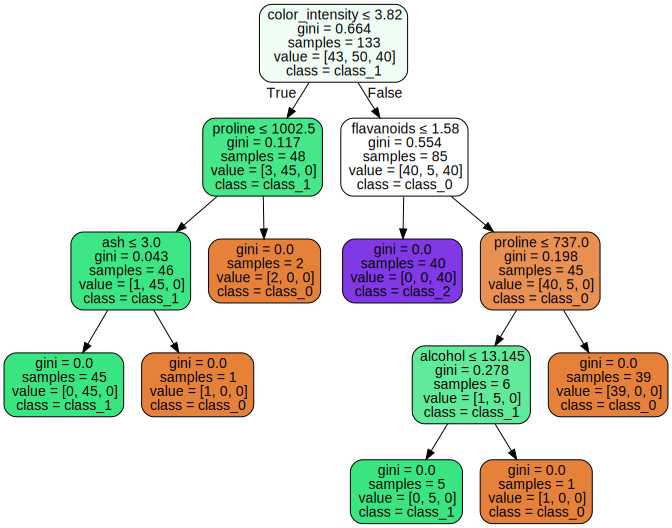

In [12]:
graph_data = tree.export_graphviz(model, out_file=None, 
                         feature_names=data.feature_names,  
                         class_names=data.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True
                               )  
graph = graphviz.Source(graph_data)  
graph

In [15]:
model = tree.DecisionTreeClassifier(max_depth=3, max_features=None)
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

train_mse = sklearn.metrics.mean_squared_error(Y_train, Y_train_pred)
test_mse = sklearn.metrics.mean_squared_error(Y_test, Y_test_pred)
print("Train MSE {}".format(train_mse))
print("Test MSE {}".format(test_mse))

train_accuracy = sklearn.metrics.accuracy_score(Y_train, Y_train_pred)
test_accuracy = sklearn.metrics.accuracy_score(Y_test, Y_test_pred)
print("Train Accuracy {}%".format(train_accuracy*100.0))
print("Test Accuracy {}%".format(test_accuracy*100))

Train MSE 0.00751879699248
Test MSE 0.0666666666667
Train Accuracy 99.2481203008%
Test Accuracy 93.3333333333%


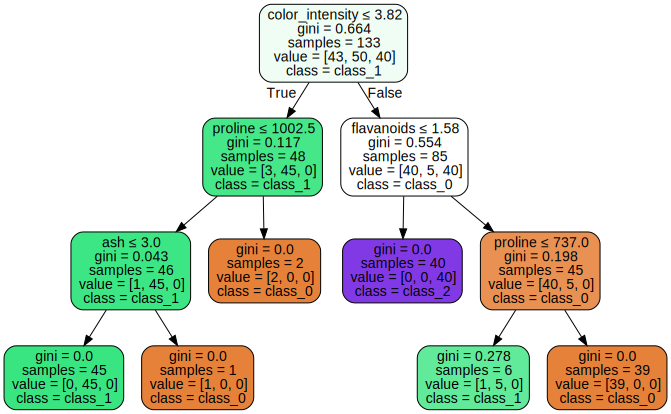

In [16]:
graph_data = tree.export_graphviz(model, out_file=None, 
                         feature_names=data.feature_names,  
                         class_names=data.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True
                               )  
graph = graphviz.Source(graph_data)  
graph